In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

## 1. tf.GradientTape

tf.GradientTape() : forward 과정에서 연산한 결과들 중, backpropagation에서 사용하기 위해 저장해야 하는 값들이 존재한다  
=> 이를 저장하기 위한 것이 tf.GradientTape  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;모델을 이용한 예측 과정에서의 연산들과, loss를 연산한 결과들을 저장

In [7]:
t1 = tf.Variable([1, 2, 3], dtype=tf.float32)
t2 = tf.Variable([10, 20, 30], dtype=tf.float32)

with tf.GradientTape() as tape:
    t3 = t1 * t2
    t4 = t3 + t2

print(t1.numpy())
print(t2.numpy())
print(t3.numpy())
print(t4.numpy())
print()

# gradients = tape.gradient(t3, [t1, t2, t3]) # partial(t3)/partial(t1), partial(t3)/partial(t2)를 구하겠다는 것
gradients = tape.gradient(t4, [t1, t2, t3])
print(type(gradients), '\n')

# print("[gradients1] dt1: ", gradients[0])
# print("[gradients1] dt2: ", gradients[1])
print("[gradients] dt1: ", gradients[0])
print("[gradients] dt2: ", gradients[1])
print("[gradients] dt3: ", gradients[2])

[1. 2. 3.]
[10. 20. 30.]
[10. 40. 90.]
[ 20.  60. 120.]

<class 'list'> 

[gradients] dt1:  tf.Tensor([10. 20. 30.], shape=(3,), dtype=float32)
[gradients] dt2:  tf.Tensor([2. 3. 4.], shape=(3,), dtype=float32)
[gradients] dt3:  tf.Tensor([1. 1. 1.], shape=(3,), dtype=float32)


In [9]:
t1 = tf.constant([1, 2, 3], dtype=tf.float32)  # tf.constant -> input data의 역할, back propagation이 이루어질 필요가 없는 데이터
t2 = tf.Variable([10, 20, 30], dtype=tf.float32)

with tf.GradientTape() as tape:
    t3 = t1 * t2

gradients = tape.gradient(t3, [t1, t2])
print(type(gradients), '\n')

print("dt1: ", gradients[0])   # constant에 대한 gradient는 저장하지 않음
print("dt2: ", gradients[1])

<class 'list'> 

dt1:  None
dt2:  tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)


## 2. Linear Regression에 적용해보기

In [10]:
x_data = tf.random.normal(shape=(1000,), dtype=tf.float32)
y_data = 3*x_data + 1

print(x_data.dtype, y_data.dtype)

<dtype: 'float32'> <dtype: 'float32'>


In [13]:
w = tf.Variable(-1.)
b = tf.Variable(-1.)

LR = 0.001
EPOCHS = 10
w_trace, b_trace = [], []
for epoch in range(EPOCHS):
    for x, y in zip(x_data, y_data):
        with tf.GradientTape() as tape:
            prediction = w*x + b
            loss = (prediction - y)**2
        gradients = tape.gradient(loss, [w, b])

        w_trace.append(w.numpy())
        b_trace.append(b.numpy())
        w = tf.Variable(w - LR*gradients[0])
        b = tf.Variable(b - LR*gradients[1])


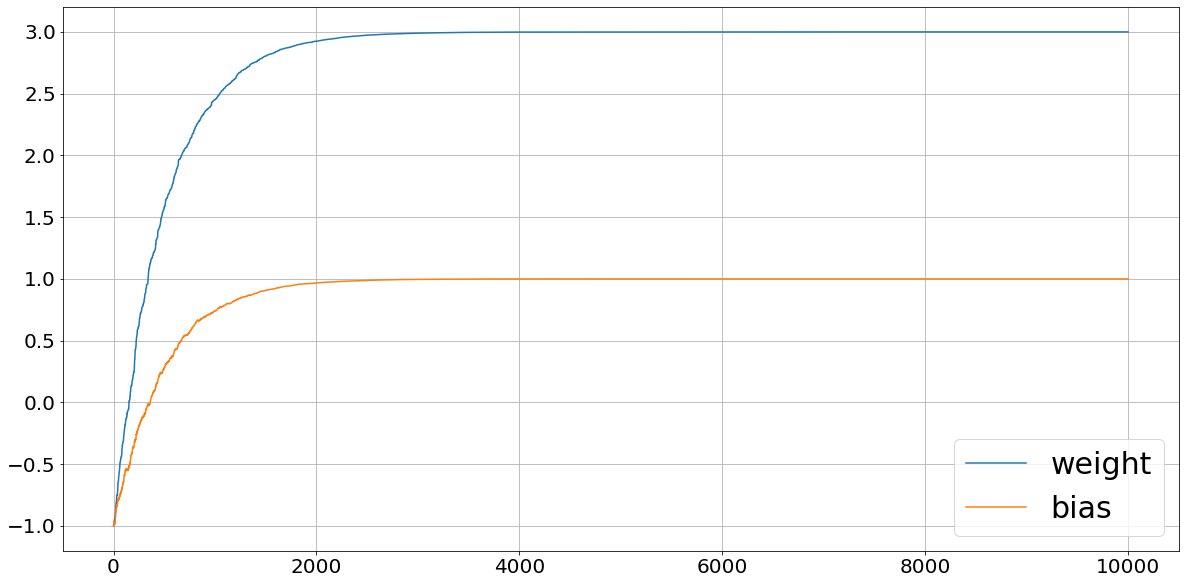

In [14]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(w_trace, label='weight')
ax.plot(b_trace, label='bias')

ax.tick_params(labelsize=20)
ax.legend(fontsize=30)
ax.grid()